In [1]:
import pandas
import numpy

In [2]:
obesity_headings = pandas.read_excel("aust_health_tracker_data_lga.xlsx", 
                                     sheet_name='Risk_factors_estimates', nrows=4).T

obesity_headings.reset_index(inplace=True)
obesity_headings.rename(columns={'index': 'High_level_title', 3: 'Low_level_title', 2: 'Year_range'}, inplace=True)
obesity_headings['Downshift_major_title'] = obesity_headings.High_level_title.shift(1)
obesity_headings['Downshift_year_range'] = obesity_headings.Year_range.shift(1)
obesity_headings = obesity_headings[obesity_headings.Low_level_title == 'ASR per 100']
obesity_headings.loc[obesity_headings.Downshift_major_title.str.startswith('Unname'), 'Downshift_major_title'] = numpy.nan
obesity_headings['Downshift_major_title'] = obesity_headings['Downshift_major_title'].fillna(method='ffill')
obesity_headings['Downshift_major_title'] = obesity_headings.Downshift_major_title.str.replace('Estimated number of ','')
obesity_headings['Downshift_major_title'] = obesity_headings.Downshift_major_title.str.replace(' (modelled estimates)','', regex=False)
obesity_headings = obesity_headings[obesity_headings.Downshift_major_title.str.contains('obese')]
obesity_headings['tuples'] = obesity_headings[['Downshift_major_title', 'Downshift_year_range']].apply(tuple, axis=1)
obesity_headings

,High_level_title,0,1,Year_range,Low_level_title,Downshift_major_title,Downshift_year_range,tuples
4,Unnamed: 4,NaN,NaN,NaN,ASR per 100,children aged 2-17 years who were obese,2014-15,"(children aged 2-17 years who were obese, 2014..."
12,Unnamed: 12,NaN,NaN,NaN,ASR per 100,children aged 2-17 years who were obese,2017-18,"(children aged 2-17 years who were obese, 2017..."
21,Unnamed: 21,NaN,NaN,NaN,ASR per 100,children aged 2-17 years who were overweight o...,2014-15,(children aged 2-17 years who were overweight ...
29,Unnamed: 29,NaN,NaN,NaN,ASR per 100,children aged 2-17 years who were overweight o...,2017-18,(children aged 2-17 years who were overweight ...
38,Unnamed: 38,NaN,NaN,NaN,ASR per 100,people aged 18 years and over who were obese,2014-15,"(people aged 18 years and over who were obese,..."
46,Unnamed: 46,NaN,NaN,NaN,ASR per 100,people aged 18 years and over who were obese,2017-18,"(people aged 18 years and over who were obese,..."
55,Unnamed: 55,NaN,NaN,NaN,ASR per 100,people aged 18 years and over who were overwei...,2014-15,(people aged 18 years and over who were overwe...
63,Unnamed: 63,NaN,NaN,NaN,ASR per 100,people aged 18 years and over who were overwei...,2017-18,(people aged 18 years and over who were overwe...
72,Unnamed: 72,NaN,NaN,NaN,ASR per 100,males aged 2-17 years who were obese,2014-15,"(males aged 2-17 years who were obese, 2014-15)"
80,Unnamed: 80,NaN,NaN,NaN,ASR per 100,males aged 2-17 years who were obese,2017-18,"(males aged 2-17 years who were obese, 2017-18)"


In [3]:
rename_dict = obesity_headings.set_index('High_level_title').tuples.to_dict()
rename_dict

{'Unnamed: 4': ('children aged 2-17 years who were obese', '2014-15'),
 'Unnamed: 12': ('children aged 2-17 years who were obese', '2017-18'),
 'Unnamed: 21': ('children aged 2-17 years who were overweight or obese',
  '2014-15'),
 'Unnamed: 29': ('children aged 2-17 years who were overweight or obese',
  '2017-18'),
 'Unnamed: 38': ('people aged 18 years and over who were obese', '2014-15'),
 'Unnamed: 46': ('people aged 18 years and over who were obese', '2017-18'),
 'Unnamed: 55': ('people aged 18 years and over who were overweight or obese',
  '2014-15'),
 'Unnamed: 63': ('people aged 18 years and over who were overweight or obese',
  '2017-18'),
 'Unnamed: 72': ('males aged 2-17 years who were obese', '2014-15'),
 'Unnamed: 80': ('males aged 2-17 years who were obese', '2017-18'),
 'Unnamed: 89': ('males aged 2-17 years who were overweight or obese',
  '2014-15'),
 'Unnamed: 97': ('males aged 2-17 years who were overweight or obese',
  '2017-18'),
 'Unnamed: 106': ('males aged 18 

In [4]:
supposed_to_be_numeric = list(rename_dict.values())

In [5]:
rename_dict['© 2020 PHIDU'] = 'StatsCode'
rename_dict['This content is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 3.0 Australia licence.  '] = 'Geoname'
rename_dict['Unnamed: 2'] = 'Quality'

In [6]:
obesity_data = pandas.read_excel("aust_health_tracker_data_lga.xlsx", 
                                     sheet_name='Risk_factors_estimates', na_values='..', keep_default_na=True)
obesity_data = obesity_data[sorted(rename_dict.keys(), reverse=True)].rename(columns=rename_dict).dropna()
obesity_data = obesity_data[obesity_data.StatsCode != 'Code'].dropna()
for column in supposed_to_be_numeric:
    obesity_data[column] = obesity_data[column].map(float)
obesity_data

,StatsCode,"(males aged 2-17 years who were overweight or obese, 2017-18)","(males aged 2-17 years who were overweight or obese, 2014-15)","(males aged 2-17 years who were obese, 2017-18)","(males aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were overweight or obese, 2017-18)","(people aged 18 years and over who were overweight or obese, 2014-15)","(people aged 18 years and over who were obese, 2017-18)","(children aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were obese, 2014-15)",...,"(females aged 2-17 years who were overweight or obese, 2017-18)","(females aged 2-17 years who were overweight or obese, 2014-15)","(females aged 2-17 years who were obese, 2017-18)","(females aged 2-17 years who were obese, 2014-15)","(males aged 18 years and over who were overweight or obese, 2017-18)","(males aged 18 years and over who were overweight or obese, 2014-15)","(children aged 2-17 years who were obese, 2017-18)","(males aged 18 years and over who were obese, 2017-18)","(males aged 18 years and over who were obese, 2014-15)",Geoname
5,10050,28.354837,24.973482,11.365536,6.586923,74.749894,69.714542,39.262286,7.435033,36.221681,...,27.090802,21.516703,11.019012,9.046217,83.120238,75.740784,11.188844,40.883114,37.175308,Albury (C)
6,10130,26.883966,24.439067,10.951347,6.263233,74.103942,66.776738,40.244470,7.173967,33.596448,...,26.304875,20.453143,10.831218,8.707337,81.509888,72.861784,10.889334,41.612731,34.281944,Armidale Regional (A)
7,10250,26.014971,23.726022,9.165788,5.408469,67.328461,64.302615,31.520531,6.107837,30.646161,...,24.928723,19.423131,9.025358,7.472352,75.111899,70.558977,9.058846,32.807002,31.275817,Ballina (A)
8,10300,29.893225,30.791994,10.484531,8.686560,78.353077,73.947319,39.940516,9.794957,39.208793,...,24.354779,25.889384,10.035130,11.821927,85.641336,79.956846,10.335222,41.133755,39.816795,Balranald (A)
9,10470,29.364806,25.048185,11.178825,7.005852,76.549903,70.654105,43.681636,7.863079,36.677799,...,27.834947,21.380961,10.819742,9.444960,84.523078,76.336206,10.990742,45.114237,37.133218,Bathurst Regional (A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,71000,28.196263,27.678816,9.895545,6.029552,61.271892,62.227751,25.591441,5.920766,25.690621,...,26.270592,24.857619,9.333187,6.208542,68.365802,71.720298,9.657540,26.925846,29.215988,Darwin (C)
555,72200,27.335878,29.879757,10.864449,9.765457,72.052191,77.815374,39.161896,9.428272,43.288313,...,25.806196,26.041364,10.564464,9.703155,79.011740,85.879289,10.816755,40.686270,48.264010,Katherine (T)
556,72300,25.246485,28.176360,7.607006,7.836165,67.752091,68.829365,33.687773,7.757120,30.732182,...,22.360890,26.332544,7.326585,8.122813,74.634367,78.048282,7.468705,34.951688,34.646629,Litchfield (M)
558,72800,26.838902,27.110069,9.807280,7.453576,65.859004,69.562441,32.007265,7.246765,32.194865,...,26.107662,24.058572,9.487897,7.524222,73.016039,79.565728,9.738587,33.220084,36.738952,Palmerston (C)


In [7]:
altitudes = pandas.read_csv('altitudes.csv')
altitudes.rename(columns={'elevation_above_sea_level': 'Altitude',
                         'Australian_Statistical_Geography_2016_ID': 'LongStatsCode',
                         'lgaLabel': 'Name'}, inplace=True)

In [8]:
altitudes = altitudes[altitudes.LongStatsCode.str.startswith('LGA')].copy()
altitudes['StatsCode'] = altitudes['LongStatsCode'].str.replace('LGA', '')
altitudes.StatsCode = altitudes.StatsCode.map(int)
altitudes

,lga,Altitude,LongStatsCode,Name,StatsCode
7,http://www.wikidata.org/entity/Q660298,1.0,LGA23110,City of Hobsons Bay,23110
51,http://www.wikidata.org/entity/Q805266,3.0,LGA10250,Ballina Shire,10250
77,http://www.wikidata.org/entity/Q1919098,4.0,LGA24600,City of Melbourne,24600
87,http://www.wikidata.org/entity/Q820280,4.0,LGA15050,City of Maitland,15050
92,http://www.wikidata.org/entity/Q1430843,4.0,LGA16650,City of Rockdale,16650
...,...,...,...,...,...
4044,http://www.wikidata.org/entity/Q940748,930.0,LGA17400,Tenterfield Shire,17400
4064,http://www.wikidata.org/entity/Q820180,1065.0,LGA17850,Walcha Shire,17850
4069,http://www.wikidata.org/entity/Q586012,1098.0,LGA14870,City of Lithgow,14870
4072,http://www.wikidata.org/entity/Q753416,1120.0,LGA13010,Glen Innes Severn,13010


Data I'm missing altitudes (and LGA details for...)

In [9]:
obesity_data[~obesity_data.StatsCode.isin(altitudes.StatsCode)][['StatsCode', 'Geoname']]

,StatsCode,Geoname
6,10130,Armidale Regional (A)
28,11570,Canterbury-Bankstown (A)
30,11650,Central Coast (C)
40,12380,Cumberland (A)
41,18230,Dubbo Regional (A)
43,12730,Edward River (A)
46,12870,Federation (A)
48,12930,Georges River (A)
58,13910,Hilltops (A)
61,14170,Inner West (A)


In [10]:
df = obesity_data.merge(altitudes, on='StatsCode').set_index(['StatsCode', 'Geoname', 'Quality'])
df

,,,"(males aged 2-17 years who were overweight or obese, 2017-18)","(males aged 2-17 years who were overweight or obese, 2014-15)","(males aged 2-17 years who were obese, 2017-18)","(males aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were overweight or obese, 2017-18)","(people aged 18 years and over who were overweight or obese, 2014-15)","(people aged 18 years and over who were obese, 2017-18)","(children aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were obese, 2014-15)","(children aged 2-17 years who were overweight or obese, 2017-18)",...,"(females aged 2-17 years who were obese, 2014-15)","(males aged 18 years and over who were overweight or obese, 2017-18)","(males aged 18 years and over who were overweight or obese, 2014-15)","(children aged 2-17 years who were obese, 2017-18)","(males aged 18 years and over who were obese, 2017-18)","(males aged 18 years and over who were obese, 2014-15)",lga,Altitude,LongStatsCode,Name
StatsCode,Geoname,Quality,,,,,,,,,,,,,,,,,,,,,
10050,Albury (C),Good,28.354837,24.973482,11.365536,6.586923,74.749894,69.714542,39.262286,7.435033,36.221681,27.686718,...,9.046217,83.120238,75.740784,11.188844,40.883114,37.175308,http://www.wikidata.org/entity/Q1719401,329.0,LGA10050,City of Albury
10250,Ballina (A),Good,26.014971,23.726022,9.165788,5.408469,67.328461,64.302615,31.520531,6.107837,30.646161,25.399054,...,7.472352,75.111899,70.558977,9.058846,32.807002,31.275817,http://www.wikidata.org/entity/Q805266,3.0,LGA10250,Ballina Shire
10300,Balranald (A),Poor,29.893225,30.791994,10.484531,8.686560,78.353077,73.947319,39.940516,9.794957,39.208793,27.153850,...,11.821927,85.641336,79.956846,10.335222,41.133755,39.816795,http://www.wikidata.org/entity/Q751598,66.0,LGA10300,Balranald Shire
10470,Bathurst Regional (A),Good,29.364806,25.048185,11.178825,7.005852,76.549903,70.654105,43.681636,7.863079,36.677799,28.567291,...,9.444960,84.523078,76.336206,10.990742,45.114237,37.133218,http://www.wikidata.org/entity/Q786795,735.0,LGA10470,Bathurst Regional Council
10550,Bega Valley (A),Good,29.096448,23.735305,11.207925,5.997012,69.700355,65.143968,34.594131,6.783065,31.323637,28.175569,...,8.179308,77.907921,71.377878,11.030882,36.096408,31.995396,http://www.wikidata.org/entity/Q752512,143.0,LGA10550,Bega Valley Shire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65410,Waratah/Wynyard (M),Good,30.699689,28.612186,11.520622,7.678750,68.772947,67.508733,35.910997,7.622549,34.305009,29.685394,...,8.090632,76.268191,74.546400,11.406151,37.119176,37.593086,http://www.wikidata.org/entity/Q1848324,558.0,LGA65410,Waratah-Wynyard
65810,West Tamar (M),Good,28.497889,26.381916,10.937236,5.852958,67.531600,65.248947,33.371303,5.774732,31.069792,27.153456,...,6.069506,75.741700,71.872492,10.675719,34.832878,34.053293,http://www.wikidata.org/entity/Q1665325,135.0,LGA65810,West Tamar Council
72200,Katherine (T),Good,27.335878,29.879757,10.864449,9.765457,72.052191,77.815374,39.161896,9.428272,43.288313,26.600350,...,9.703155,79.011740,85.879289,10.816755,40.686270,48.264010,http://www.wikidata.org/entity/Q3678526,176.0,LGA72200,Town of Katherine


In [11]:
import sklearn.linear_model

In [12]:
len(df.columns)

28

In [13]:
df.corr()['Altitude'].sort_values()

(males aged 2-17 years who were overweight or obese, 2014-15)            -0.054660
(children aged 2-17 years who were overweight or obese, 2014-15)         -0.006698
(females aged 2-17 years who were overweight or obese, 2014-15)           0.049047
(males aged 2-17 years who were obese, 2014-15)                           0.118014
(children aged 2-17 years who were obese, 2014-15)                        0.142520
(females aged 2-17 years who were obese, 2014-15)                         0.157181
(females aged 2-17 years who were overweight or obese, 2017-18)           0.223210
(children aged 2-17 years who were overweight or obese, 2017-18)          0.248475
(males aged 2-17 years who were overweight or obese, 2017-18)             0.258902
(males aged 18 years and over who were overweight or obese, 2017-18)      0.321619
(people aged 18 years and over who were overweight or obese, 2017-18)     0.334162
(females aged 18 years and over who were overweight or obese, 2017-18)    0.334400
(fem

In [14]:
df.corr('spearman')['Altitude'].sort_values()

(males aged 2-17 years who were overweight or obese, 2014-15)             0.004134
(children aged 2-17 years who were overweight or obese, 2014-15)          0.050217
(females aged 2-17 years who were overweight or obese, 2014-15)           0.113925
(males aged 2-17 years who were obese, 2014-15)                           0.133071
(children aged 2-17 years who were obese, 2014-15)                        0.155439
(females aged 2-17 years who were obese, 2014-15)                         0.162873
(females aged 2-17 years who were overweight or obese, 2017-18)           0.337458
(children aged 2-17 years who were overweight or obese, 2017-18)          0.353754
(males aged 2-17 years who were overweight or obese, 2017-18)             0.354341
(males aged 18 years and over who were overweight or obese, 2014-15)      0.387410
(females aged 18 years and over who were obese, 2014-15)                  0.393195
(females aged 2-17 years who were obese, 2017-18)                         0.395159
(chi

In [15]:
df.corr('kendall')['Altitude'].sort_values()

(males aged 2-17 years who were overweight or obese, 2014-15)            -0.002358
(children aged 2-17 years who were overweight or obese, 2014-15)          0.028281
(females aged 2-17 years who were overweight or obese, 2014-15)           0.070400
(males aged 2-17 years who were obese, 2014-15)                           0.088665
(children aged 2-17 years who were obese, 2014-15)                        0.101464
(females aged 2-17 years who were obese, 2014-15)                         0.105927
(females aged 2-17 years who were overweight or obese, 2017-18)           0.224712
(children aged 2-17 years who were overweight or obese, 2017-18)          0.234630
(males aged 2-17 years who were overweight or obese, 2017-18)             0.235524
(males aged 18 years and over who were overweight or obese, 2014-15)      0.260072
(females aged 18 years and over who were obese, 2014-15)                  0.261163
(females aged 2-17 years who were obese, 2017-18)                         0.263162
(chi

In [16]:
charting_df = df.reset_index().melt(id_vars=['StatsCode', 'Geoname', 'Quality', 'Altitude'])
charting_df = charting_df[~charting_df.variable.isin(['Name', 'LongStatsCode', 'lga'])]
charting_df['xmeasure'] = charting_df.variable.map(lambda x: x[0])
charting_df['year_range']= charting_df.variable.map(lambda x: x[1])
del charting_df['variable']
charting_df.rename(columns={'value': 'rate'}, inplace=True)
charting_df['language1'] = charting_df.xmeasure.str.split('aged')
charting_df['gender'] = charting_df['language1'].map(lambda x: x[0])
charting_df['language2'] = charting_df.language1.map(lambda x: x[1]).str.split(' years ')
charting_df['age_range'] = charting_df.language2.map(lambda x: x[0])
charting_df['language3'] = charting_df.language2.map(lambda x: x[1]).str.split('who were ')
charting_df['condition'] = charting_df.language3.map(lambda x: x[1])
del charting_df['language1']
del charting_df['language2']
del charting_df['language3']
del charting_df['xmeasure']
charting_df

,StatsCode,Geoname,Quality,Altitude,rate,year_range,gender,age_range,condition
0,10050,Albury (C),Good,329.0,28.354837,2017-18,males,2-17,overweight or obese
1,10250,Ballina (A),Good,3.0,26.014971,2017-18,males,2-17,overweight or obese
2,10300,Balranald (A),Poor,66.0,29.893225,2017-18,males,2-17,overweight or obese
3,10470,Bathurst Regional (A),Good,735.0,29.364806,2017-18,males,2-17,overweight or obese
4,10550,Bega Valley (A),Good,143.0,29.096448,2017-18,males,2-17,overweight or obese
...,...,...,...,...,...,...,...,...,...
9235,65410,Waratah/Wynyard (M),Good,558.0,37.593086,2014-15,males,18,obese
9236,65810,West Tamar (M),Good,135.0,34.053293,2014-15,males,18,obese
9237,72200,Katherine (T),Good,176.0,48.26401,2014-15,males,18,obese
9238,72300,Litchfield (M),Good,37.0,34.646629,2014-15,males,18,obese


In [17]:
charting_df.to_csv('chart-ready-data.csv', index=False)

In [18]:
charting_df.StatsCode

0       10050
1       10250
2       10300
3       10470
4       10550
        ...  
9235    65410
9236    65810
9237    72200
9238    72300
9239    72800
Name: StatsCode, Length: 9240, dtype: int64

In [19]:
charting_df.StatsCode.nunique()

384

In [20]:
import os
import requests
import tqdm
os.makedirs('lga-stats', exist_ok=True)
for stats_code in tqdm.tqdm(charting_df.StatsCode.unique()):
    cache_file = f'lga-stats/LGA_{stats_code}.csv'
    if os.path.exists(cache_file):
        continue
    r = requests.get(f'https://dbr.abs.gov.au/json/csv/LGA_{stats_code}.csv')
    with open(cache_file, 'w') as f:
        f.write(r.text) 

100%|██████████| 384/384 [00:59<00:00,  6.40it/s]


In [21]:
df

,,,"(males aged 2-17 years who were overweight or obese, 2017-18)","(males aged 2-17 years who were overweight or obese, 2014-15)","(males aged 2-17 years who were obese, 2017-18)","(males aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were overweight or obese, 2017-18)","(people aged 18 years and over who were overweight or obese, 2014-15)","(people aged 18 years and over who were obese, 2017-18)","(children aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were obese, 2014-15)","(children aged 2-17 years who were overweight or obese, 2017-18)",...,"(females aged 2-17 years who were obese, 2014-15)","(males aged 18 years and over who were overweight or obese, 2017-18)","(males aged 18 years and over who were overweight or obese, 2014-15)","(children aged 2-17 years who were obese, 2017-18)","(males aged 18 years and over who were obese, 2017-18)","(males aged 18 years and over who were obese, 2014-15)",lga,Altitude,LongStatsCode,Name
StatsCode,Geoname,Quality,,,,,,,,,,,,,,,,,,,,,
10050,Albury (C),Good,28.354837,24.973482,11.365536,6.586923,74.749894,69.714542,39.262286,7.435033,36.221681,27.686718,...,9.046217,83.120238,75.740784,11.188844,40.883114,37.175308,http://www.wikidata.org/entity/Q1719401,329.0,LGA10050,City of Albury
10250,Ballina (A),Good,26.014971,23.726022,9.165788,5.408469,67.328461,64.302615,31.520531,6.107837,30.646161,25.399054,...,7.472352,75.111899,70.558977,9.058846,32.807002,31.275817,http://www.wikidata.org/entity/Q805266,3.0,LGA10250,Ballina Shire
10300,Balranald (A),Poor,29.893225,30.791994,10.484531,8.686560,78.353077,73.947319,39.940516,9.794957,39.208793,27.153850,...,11.821927,85.641336,79.956846,10.335222,41.133755,39.816795,http://www.wikidata.org/entity/Q751598,66.0,LGA10300,Balranald Shire
10470,Bathurst Regional (A),Good,29.364806,25.048185,11.178825,7.005852,76.549903,70.654105,43.681636,7.863079,36.677799,28.567291,...,9.444960,84.523078,76.336206,10.990742,45.114237,37.133218,http://www.wikidata.org/entity/Q786795,735.0,LGA10470,Bathurst Regional Council
10550,Bega Valley (A),Good,29.096448,23.735305,11.207925,5.997012,69.700355,65.143968,34.594131,6.783065,31.323637,28.175569,...,8.179308,77.907921,71.377878,11.030882,36.096408,31.995396,http://www.wikidata.org/entity/Q752512,143.0,LGA10550,Bega Valley Shire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65410,Waratah/Wynyard (M),Good,30.699689,28.612186,11.520622,7.678750,68.772947,67.508733,35.910997,7.622549,34.305009,29.685394,...,8.090632,76.268191,74.546400,11.406151,37.119176,37.593086,http://www.wikidata.org/entity/Q1848324,558.0,LGA65410,Waratah-Wynyard
65810,West Tamar (M),Good,28.497889,26.381916,10.937236,5.852958,67.531600,65.248947,33.371303,5.774732,31.069792,27.153456,...,6.069506,75.741700,71.872492,10.675719,34.832878,34.053293,http://www.wikidata.org/entity/Q1665325,135.0,LGA65810,West Tamar Council
72200,Katherine (T),Good,27.335878,29.879757,10.864449,9.765457,72.052191,77.815374,39.161896,9.428272,43.288313,26.600350,...,9.703155,79.011740,85.879289,10.816755,40.686270,48.264010,http://www.wikidata.org/entity/Q3678526,176.0,LGA72200,Town of Katherine


In [55]:
import functools
@functools.lru_cache(400)
def get_csv(filename):
    csv = pandas.read_csv(filename)
    csv['CleanedDescription'] = csv.Description.str.replace(' *','', regex=False)
    del csv['Description']
    csv.rename(columns={'CleanedDescription': 'Description'}, inplace=True)
    csv.set_index(['Parent Description', 'Description'], inplace=True)
    return csv

In [68]:
y2017_stats = None
iterator= tqdm.tqdm(charting_df.StatsCode.unique())
column_count = 0
for stats_code in iterator:
    iterator.set_description(f"{stats_code}: {column_count} columns")
    try:
        this_csv_file = get_csv(f"lga-stats/LGA_{stats_code}.csv")
    except FileNotFoundError:
        continue
    y2017_column = this_csv_file[['2017']].rename(columns={'2017': stats_code}).T
    cleaned_up_df = y2017_column.reset_index().rename(columns={'index': 'StatsCode'}).set_index('StatsCode')
    if y2017_stats is None:
        y2017_stats = cleaned_up_df.copy()
    else:
        y2017_stats = pandas.concat([y2017_stats, cleaned_up_df],axis=0)
    column_count = y2017_stats.shape[1]
keep_columns = []
for column in y2017_stats:
    if y2017_stats[column].notnull().all():
        keep_columns.append(column)
y2017_stats = y2017_stats[keep_columns].copy()
y2017_stats.sort_index(inplace=True)
y2017_stats

72800: 667 columns: 100%|██████████| 384/384 [00:03<00:00, 97.66it/s] 


Parent Description Births and deaths - year ended 31 December               \
Description                                      Births (no.) Deaths (no.)   
StatsCode                                                                    
10050                                                   690.0        431.0   
10250                                                   381.0        433.0   
10300                                                    47.0         18.0   
10470                                                   498.0        309.0   
10550                                                   292.0        380.0   
...                                                       ...          ...   
65410                                                   148.0        159.0   
65810                                                   222.0        192.0   
72200                                                   177.0         82.0   
72300                                                   265.0         85.0   
72800                                                   809.0        108.0   

Parent Description    Business entries - year ended 30 June  \
Description        Number of non employing business entries   
StatsCode                                                     
10050                                                 352.0   
10250                                                 284.0   
10300                                                  16.0   
10470                                                 257.0   
10550                                                 201.0   
...                                                     ...   
65410                                                  65.0   
65810                                                 122.0   
72200                                                  62.0   
72300                                                 192.0   
72800                                                 182.0   

Parent Description                                   \
Description        Total number of business entries   
StatsCode                                             
10050                                         526.0   
10250                                         450.0   
10300                                          21.0   
10470                                         383.0   
10550                                         296.0   
...                                             ...   
65410                                          79.0   
65810                                         165.0   
72200                                          92.0   
72300                                         262.0   
72800                                         281.0   

Parent Description Business entries by turnover - year ended 30 June  \
Description           Number of business entries by turnover - total   
StatsCode                                                              
10050                                                          526.0   
10250                                                          450.0   
10300                                                           21.0   
10470                                                          383.0   
10550                                                          296.0   
...                                                              ...   
65410                                                           79.0   
65810                                                          165.0   
72200                                                           92.0   
72300                                                          262.0   
72800                                                          281.0   

Parent Description                                                                      \
Description        Number of business entries with turnover of $50k to less than $200k   
StatsCode                                                       

In [71]:
economic_obesity_altitude = df.reset_index().merge(y2017_stats, on='StatsCode')
economic_obesity_altitude

/Users/gregb/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,StatsCode,Geoname,Quality,"(males aged 2-17 years who were overweight or obese, 2017-18)","(males aged 2-17 years who were overweight or obese, 2014-15)","(males aged 2-17 years who were obese, 2017-18)","(males aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were overweight or obese, 2017-18)","(people aged 18 years and over who were overweight or obese, 2014-15)","(people aged 18 years and over who were obese, 2017-18)",...,"(Registered motor vehicles - type of vehicle - at 31 January, Total registered motor vehicles (no.))","(Registered motor vehicles - year of manufacture - at 31 January, 5 to 10 years (no.))","(Registered motor vehicles - year of manufacture - at 31 January, Less than 5 years (no.))","(Registered motor vehicles - year of manufacture - at 31 January, Over 10 years (no.))","(Selected Government pensions and allowances - at 30 June, Age pension (no.))","(Selected Government pensions and allowances - at 30 June, Carer allowance (no.))","(Selected Government pensions and allowances - at 30 June, Disability support pension (no.))","(Selected Government pensions and allowances - at 30 June, Family tax benefit A (no.))","(Selected Government pensions and allowances - at 30 June, Family tax benefit B (no.))","(Solar installations - year ended 31 December, Small-scale solar panel system installations (no.))"
0,10050,Albury (C),Good,28.354837,24.973482,11.365536,6.586923,74.749894,69.714542,39.262286,...,36935.0,9391.0,10932.0,16607.0,6392.0,1544.0,2191.0,3857.0,3065.0,382.0
1,10250,Ballina (A),Good,26.014971,23.726022,9.165788,5.408469,67.328461,64.302615,31.520531,...,33621.0,8968.0,9335.0,15310.0,6816.0,1205.0,1799.0,2989.0,2213.0,775.0
2,10300,Balranald (A),Poor,29.893225,30.791994,10.484531,8.686560,78.353077,73.947319,39.940516,...,1541.0,356.0,446.0,740.0,266.0,56.0,88.0,156.0,116.0,15.0
3,10470,Bathurst Regional (A),Good,29.364806,25.048185,11.178825,7.005852,76.549903,70.654105,43.681636,...,34113.0,8565.0,10389.0,15163.0,4543.0,1066.0,1684.0,2859.0,2273.0,270.0
4,10550,Bega Valley (A),Good,29.096448,23.735305,11.207925,5.997012,69.700355,65.143968,34.594131,...,29893.0,7017.0,7453.0,15417.0,5985.0,944.0,1863.0,2383.0,1770.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,65410,Waratah/Wynyard (M),Good,30.699689,28.612186,11.520622,7.678750,68.772947,67.508733,35.910997,...,12600.0,2890.0,2588.0,7119.0,2322.0,620.0,921.0,1056.0,832.0,61.0
376,65810,West Tamar (M),Good,28.497889,26.381916,10.937236,5.852958,67.531600,65.248947,33.371303,...,21946.0,4945.0,4812.0,12208.0,3369.0,649.0,846.0,1579.0,1166.0,178.0
377,72200,Katherine (T),Good,27.335878,29.879757,10.864449,9.765457,72.052191,77.815374,39.161896,...,7153.0,1983.0,2133.0,3024.0,478.0,158.0,588.0,862.0,745.0,41.0
378,72300,Litchfield (M),Good,25.246485,28.176360,7.607006,7.836165,67.752091,68.829365,33.687773,...,19395.0,5266.0,5565.0,8545.0,991.0,291.0,421.0,896.0,738.0,251.0


In [169]:
absolute_counts = [x for x in economic_obesity_altitude.columns 
                   if ((type(x) == tuple)
                       and 
                       (('(no.)' in x[1])
                       or
                       ('Number of ' in x[1])
                       or
                       ('Total number of' in x[1]))
                      )]

In [170]:
absolute_counts

[('Births and deaths - year ended 31 December', 'Births (no.)'),
 ('Births and deaths - year ended 31 December', 'Deaths (no.)'),
 ('Business entries - year ended 30 June',
  'Number of non employing business entries'),
 ('Business entries - year ended 30 June', 'Total number of business entries'),
 ('Business entries by turnover - year ended 30 June',
  'Number of business entries by turnover - total'),
 ('Business entries by turnover - year ended 30 June',
  'Number of business entries with turnover of $50k to less than $200k'),
 ('Business exits - year ended 30 June',
  'Number of non employing business exits'),
 ('Business exits - year ended 30 June', 'Total number of business exits'),
 ('Business exits by turnover - year ended 30 June',
  'Number of business exits by turnover - total'),
 ('Business exits by turnover - year ended 30 June',
  'Number of business exits with turnover of Zero to less than $50k'),
 ('Children attending a preschool program - at 1 July',
  'Children atten

In [171]:
info_columns = ['StatsCode', 'Geoname', 'Quality', 'lga', 'LongStatsCode', 'Name']
dependent = [x for x in economic_obesity_altitude.columns if type(x) == tuple and 'obes' in x[0]]
independent = [x for x in economic_obesity_altitude.columns 
                  if ((x not in info_columns)
                      and
                      (x not in dependent)
                      and
                      (x not in absolute_counts)
                      and economic_obesity_altitude[x].dtype != 'object')]
remainder = [x for x in economic_obesity_altitude.columns
             if x not in (info_columns + dependent + independent + absolute_counts)]

In [172]:
remainder

[]

In [173]:
import sklearn.linear_model

In [174]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.RobustScaler()
X = scaler.fit_transform(economic_obesity_altitude[independent])

/Users/gregb/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [175]:
X

array([[ 0.80701754, -0.29518072, -0.41642229, ..., -0.5       ,
         0.64355864,  0.51414784],
       [-0.53869969,  0.78915663,  0.62756598, ...,  0.7       ,
         0.6938186 ,  0.73173942],
       [-0.27863777, -0.1746988 , -0.06451613, ...,  0.1       ,
        -0.29173888, -0.30796227],
       ...,
       [ 0.1754386 , -1.09036145, -0.92082111, ..., -1.5       ,
        -0.22472559, -0.348322  ],
       [-0.39834881, -0.53614458, -0.32258065, ..., -0.5       ,
        -0.11380705, -0.08247423],
       [-0.42311662, -1.40361446, -1.21407625, ..., -1.9       ,
        -0.29867129, -0.14038166]])

In [176]:
%%time
weightings = pandas.DataFrame()
iterator = tqdm.tqdm(dependent)
for target_variable in iterator:
    iterator.set_description(str(target_variable))
    y = economic_obesity_altitude[target_variable]
    lasso = sklearn.linear_model.LassoCV(max_iter=1000000)
    lasso.fit(X, y)
    coefs = pandas.Series(index=independent, data=lasso.coef_)
    weightings[target_variable] = coefs
weightings

('males aged 18 years and over who were obese', '2014-15'): 100%|██████████| 24/24 [00:11<00:00,  2.04it/s]                

CPU times: user 1min 4s, sys: 14.5 s, total: 1min 18s
Wall time: 11.8 s


,"(males aged 2-17 years who were overweight or obese, 2017-18)","(males aged 2-17 years who were overweight or obese, 2014-15)","(males aged 2-17 years who were obese, 2017-18)","(males aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were overweight or obese, 2017-18)","(people aged 18 years and over who were overweight or obese, 2014-15)","(people aged 18 years and over who were obese, 2017-18)","(children aged 2-17 years who were obese, 2014-15)","(people aged 18 years and over who were obese, 2014-15)","(children aged 2-17 years who were overweight or obese, 2017-18)",...,"(females aged 18 years and over who were obese, 2014-15)","(females aged 2-17 years who were overweight or obese, 2017-18)","(females aged 2-17 years who were overweight or obese, 2014-15)","(females aged 2-17 years who were obese, 2017-18)","(females aged 2-17 years who were obese, 2014-15)","(males aged 18 years and over who were overweight or obese, 2017-18)","(males aged 18 years and over who were overweight or obese, 2014-15)","(children aged 2-17 years who were obese, 2017-18)","(males aged 18 years and over who were obese, 2017-18)","(males aged 18 years and over who were obese, 2014-15)"
Altitude,0.00000,-0.000000,0.037727,-0.014528,0.241622,0.309339,0.624289,-0.000000,0.288379,0.000000,...,0.000108,0.000000,-0.000000,0.000000,0.048892,0.153965,0.586859,0.005358,0.646186,0.514959
"(Estimated resident population - at 30 June, Median age - females (years))",0.00000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
"(Estimated resident population - at 30 June, Median age - males (years))",0.00000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
"(Estimated resident population - at 30 June, Median age - persons (years))",0.00000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
"(Estimated resident population - at 30 June, Working age population (aged 15-64 years) (%))",-0.00000,0.000000,-0.000000,-0.099150,-0.000000,-0.710949,-0.000000,-0.000000,-0.000000,-0.210582,...,-0.000000,-0.367809,0.000000,-0.109073,-0.000000,-0.000000,-2.288078,-0.063653,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - second Quartile (%))",0.00000,0.000000,0.000000,0.176199,0.140302,0.392879,0.771925,0.077821,0.962126,0.000000,...,1.067756,0.000000,0.000000,0.000000,0.031385,0.000000,0.447920,0.000000,0.634558,0.390985
"(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - third Quartile (%))",0.00000,0.695514,0.000000,0.000000,0.490955,1.197923,0.450394,0.000000,0.505024,0.000000,...,0.067366,0.000000,0.348518,0.000000,0.000000,0.379189,1.771337,0.000000,0.309718,0.931990
"(Estimates of personal income - year ended 30 June, Total income earners (excl. Government pensions and allowances) - median age (years))",0.00000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
"(Estimates of personal income - year ended 30 June, Total investment income ($m))",-0.43474,0.000000,-0.221790,-0.000000,-0.000000,0.000000,-0.099614,-0.083284,-0.125886,-0.352040,...,-0.060988,-0.272482,0.000000,-0.214647,-0.163391,-0.010835,0.031661,-0.222945,-0.157388,-0.048880


In [177]:
weightings.T

,Altitude,"(Estimated resident population - at 30 June, Median age - females (years))","(Estimated resident population - at 30 June, Median age - males (years))","(Estimated resident population - at 30 June, Median age - persons (years))","(Estimated resident population - at 30 June, Working age population (aged 15-64 years) (%))","(Estimated resident population - females - at 30 June, Females - 0-4 years (%))","(Estimated resident population - females - at 30 June, Females - 10-14 years (%))","(Estimated resident population - females - at 30 June, Females - 15-19 years (%))","(Estimated resident population - females - at 30 June, Females - 20-24 years (%))","(Estimated resident population - females - at 30 June, Females - 25-29 years (%))",...,"(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - lowest Quartile (%))","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - p10/P50 ratio)","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - p20/P50 ratio)","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - p80/P20 ratio)","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - p80/P50 ratio)","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - second Quartile (%))","(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - third Quartile (%))","(Estimates of personal income - year ended 30 June, Total income earners (excl. Government pensions and allowances) - median age (years))","(Estimates of personal income - year ended 30 June, Total investment income ($m))","(Estimates of personal income - year ended 30 June, Total own unincorporated business income ($m))"
"(males aged 2-17 years who were overweight or obese, 2017-18)",0.000000,0.0,0.0,0.0,-0.000000,0.023615,0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.0,-0.000000,0.000000,0.000000,0.000000,-0.434740,-0.000000
"(males aged 2-17 years who were overweight or obese, 2014-15)",-0.000000,0.0,0.0,0.0,0.000000,0.148598,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.141089,-0.000000,0.0,-0.000000,0.000000,0.695514,0.000000,0.000000,-0.087487
"(males aged 2-17 years who were obese, 2017-18)",0.037727,0.0,0.0,0.0,-0.000000,0.280276,0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.0,0.000000,0.000000,0.000000,0.000000,-0.221790,-0.000000
"(males aged 2-17 years who were obese, 2014-15)",-0.014528,0.0,0.0,0.0,-0.099150,0.103852,0.003123,0.033524,0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.0,-0.000000,0.176199,0.000000,-0.000000,-0.000000,0.000000
"(people aged 18 years and over who were overweight or obese, 2017-18)",0.241622,-0.0,-0.0,-0.0,-0.000000,0.000000,0.128965,0.421538,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.0,-0.669389,0.140302,0.490955,0.000000,-0.000000,-0.385917
"(people aged 18 years and over who were overweight or obese, 2014-15)",0.309339,0.0,0.0,0.0,-0.710949,1.188431,0.155776,0.294397,-0.000000,-0.000000,...,-0.865205,0.000000,0.000000,-0.0,-0.032275,0.392879,1.197923,0.000000,0.000000,-0.163749
"(people aged 18 years and over who were obese, 2017-18)",0.624289,-0.0,-0.0,-0.0,-0.000000,0.222900,-0.000000,0.162535,0.000000,0.000000,...,-1.005345,0.000000,0.000000,-0.0,-0.019731,0.771925,0.450394,0.000000,-0.099614,-0.140231
"(children aged 2-17 years who were obese, 2014-15)",-0.000000,0.0,0.0,0.0,-0.000000,0.091162,-0.000000,0.036943,0.000000,-0.000000,...,0.000000,0.000000,-0.000000,0.0,-0.000000,0.077821,0.000000,-0.000000,-0.083284,0.153334
"(people aged 18 years and over who were obese, 2014-15)",0.288379,0.0,0.0,0.0,-0.000000,0.976729,0.274379,0.370707,-0.000000,-0.000000,...,-1.689807,-0.

In [178]:
weightings.mean(axis=1).sort_values()

(Estimates of personal income - year ended 30 June, Investment income as main source of income (%))                                  -1.021190
(Estimates of personal income - year ended 30 June, Mean employee income ($))                                                        -0.705869
(Estimated resident population - females - at 30 June, Females - 35-39 years (%))                                                    -0.567737
(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - lowest Quartile (%))   -0.426247
(Estimated resident population - females - at 30 June, Females - 45-49 years (%))                                                    -0.360432
                                                                                                                                        ...   
(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - second Quartile (%))    0.260632

In [179]:
weightings.mean(axis=1).sort_values()['Altitude']

0.1803412751791573

In [180]:
weightings.columns

Index([         ('males aged 2-17 years who were overweight or obese', '2017-18'),
                ('males aged 2-17 years who were overweight or obese', '2014-15'),
                              ('males aged 2-17 years who were obese', '2017-18'),
                              ('males aged 2-17 years who were obese', '2014-15'),
        ('people aged 18 years and over who were overweight or obese', '2017-18'),
        ('people aged 18 years and over who were overweight or obese', '2014-15'),
                      ('people aged 18 years and over who were obese', '2017-18'),
                           ('children aged 2-17 years who were obese', '2014-15'),
                      ('people aged 18 years and over who were obese', '2014-15'),
             ('children aged 2-17 years who were overweight or obese', '2017-18'),
             ('children aged 2-17 years who were overweight or obese', '2014-15'),
       ('females aged 18 years and over who were overweight or obese', '2017-18'),
    

In [181]:
weightings[('people aged 18 years and over who were obese', '2017-18')].sort_values()

(Estimates of personal income - year ended 30 June, Investment income as main source of income (%))                                  -1.554094
(Estimates of personal income - year ended 30 June, Mean employee income ($))                                                        -1.177206
(Estimated resident population - females - at 30 June, Females - 35-39 years (%))                                                    -1.135113
(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - lowest Quartile (%))   -1.005345
(Estimated resident population - females - at 30 June, Females - 45-49 years (%))                                                    -0.854338
                                                                                                                                        ...   
Altitude                                                                                                                              0.624289

In [189]:
obesity_predictors = pandas.DataFrame({'raw': weightings[('people aged 18 years and over who were obese', '2017-18')].sort_values()}
                                     )
obesity_predictors['magnitude'] = obesity_predictors.raw.abs()
obesity_predictors.sort_values('magnitude', ascending=False).head(15)

,raw,magnitude
"(Estimates of personal income - year ended 30 June, Investment income as main source of income (%))",-1.554094,1.554094
"(Estimates of personal income - year ended 30 June, Mean employee income ($))",-1.177206,1.177206
"(Estimated resident population - females - at 30 June, Females - 35-39 years (%))",-1.135113,1.135113
"(Estimated resident population - females - at 30 June, Females - 5-9 years (%))",1.114083,1.114083
"(Estimates of personal income - year ended 30 June, Own unincorporated business income earners - median age (years))",1.101663,1.101663
"(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - lowest Quartile (%))",-1.005345,1.005345
"(Estimated resident population - females - at 30 June, Females - 45-49 years (%))",-0.854338,0.854338
"(Estimated resident population - males - at 30 June, Males - 0-4 years (%))",0.784149,0.784149
"(Estimates of personal income - year ended 30 June, Total income (excl. Government pensions and allowances) - second Quartile (%))",0.771925,0.771925
Altitude,0.624289,0.624289


In [183]:
weightings.loc['Altitude']

(males aged 2-17 years who were overweight or obese, 2017-18)             0.000000
(males aged 2-17 years who were overweight or obese, 2014-15)            -0.000000
(males aged 2-17 years who were obese, 2017-18)                           0.037727
(males aged 2-17 years who were obese, 2014-15)                          -0.014528
(people aged 18 years and over who were overweight or obese, 2017-18)     0.241622
(people aged 18 years and over who were overweight or obese, 2014-15)     0.309339
(people aged 18 years and over who were obese, 2017-18)                   0.624289
(children aged 2-17 years who were obese, 2014-15)                       -0.000000
(people aged 18 years and over who were obese, 2014-15)                   0.288379
(children aged 2-17 years who were overweight or obese, 2017-18)          0.000000
(children aged 2-17 years who were overweight or obese, 2014-15)         -0.000000
(females aged 18 years and over who were overweight or obese, 2017-18)    0.263307
(fem

<AxesSubplot:>

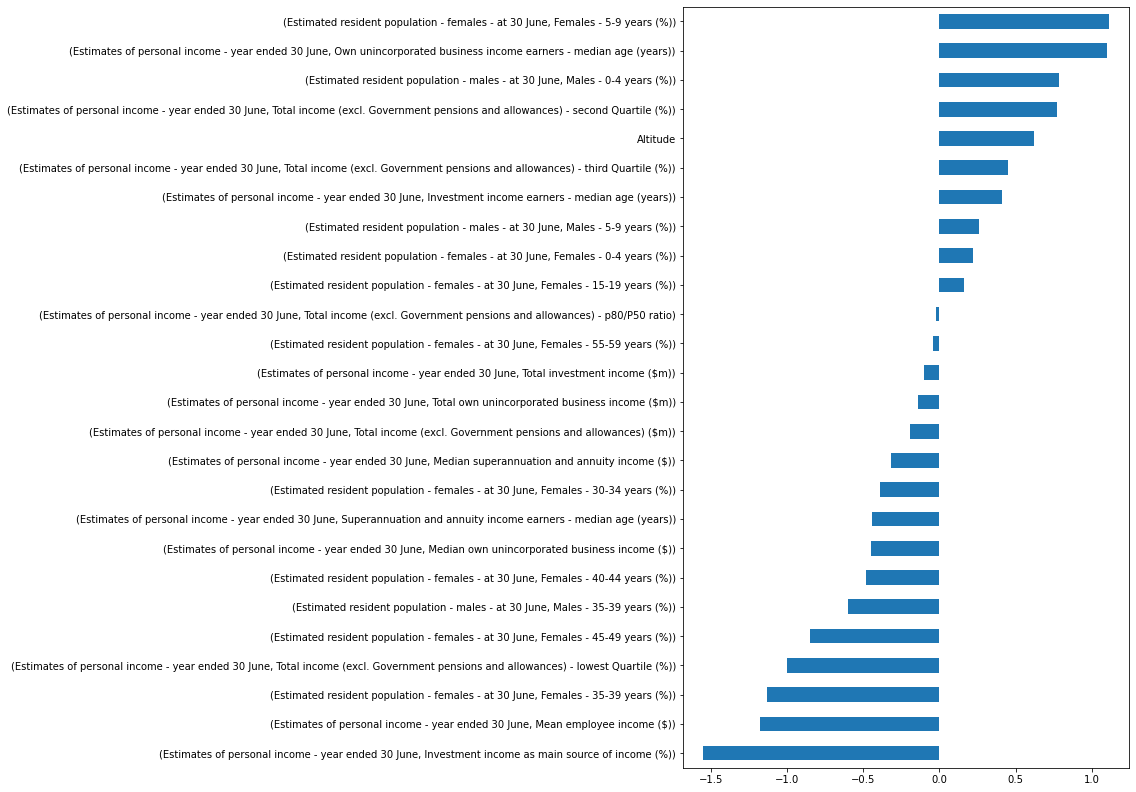

In [184]:
strong_factors = weightings[('people aged 18 years and over who were obese', '2017-18')].sort_values()
strong_factors = strong_factors[strong_factors.abs() > 0.01]
strong_factors.plot.barh(figsize=(8,14))

<AxesSubplot:>

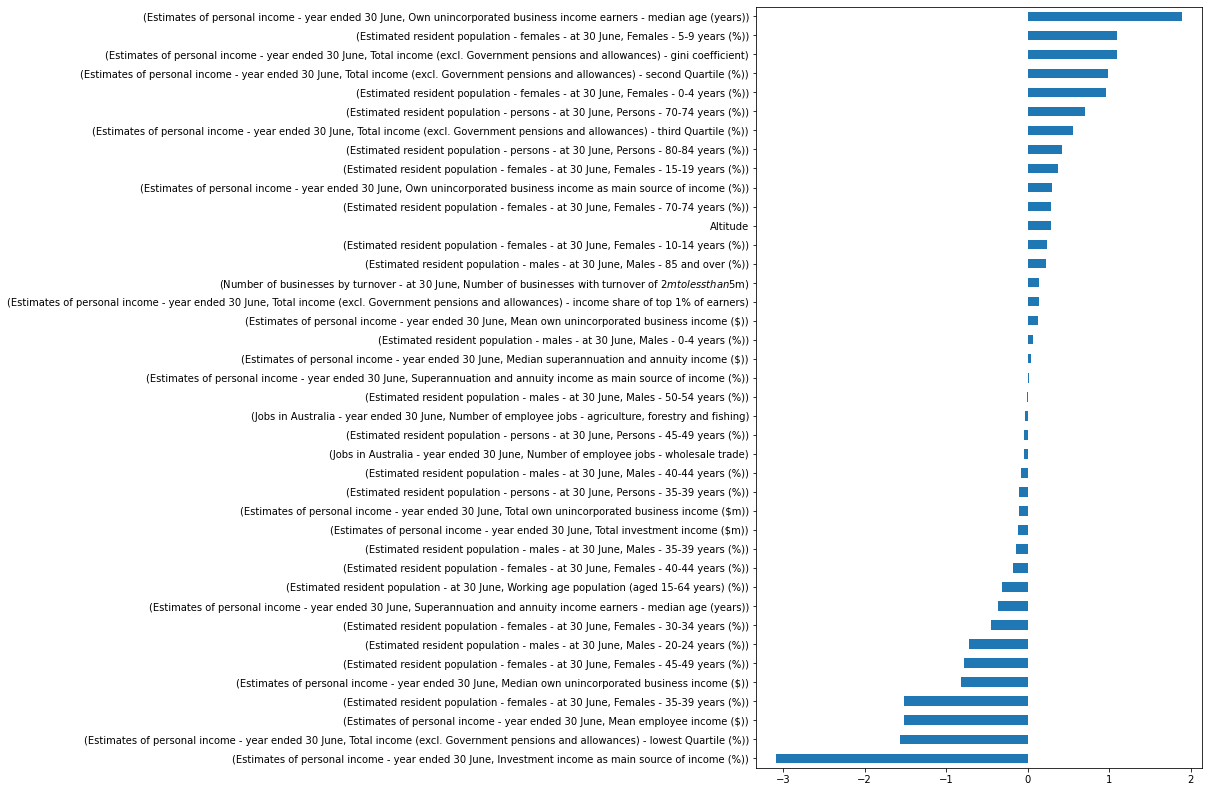

In [152]:
strong_factors = weightings[('people aged 18 years and over who were obese', '2014-15')].sort_values()
strong_factors = strong_factors[strong_factors.abs() > 0.01]
strong_factors.plot.barh(figsize=(8,14))

<AxesSubplot:>

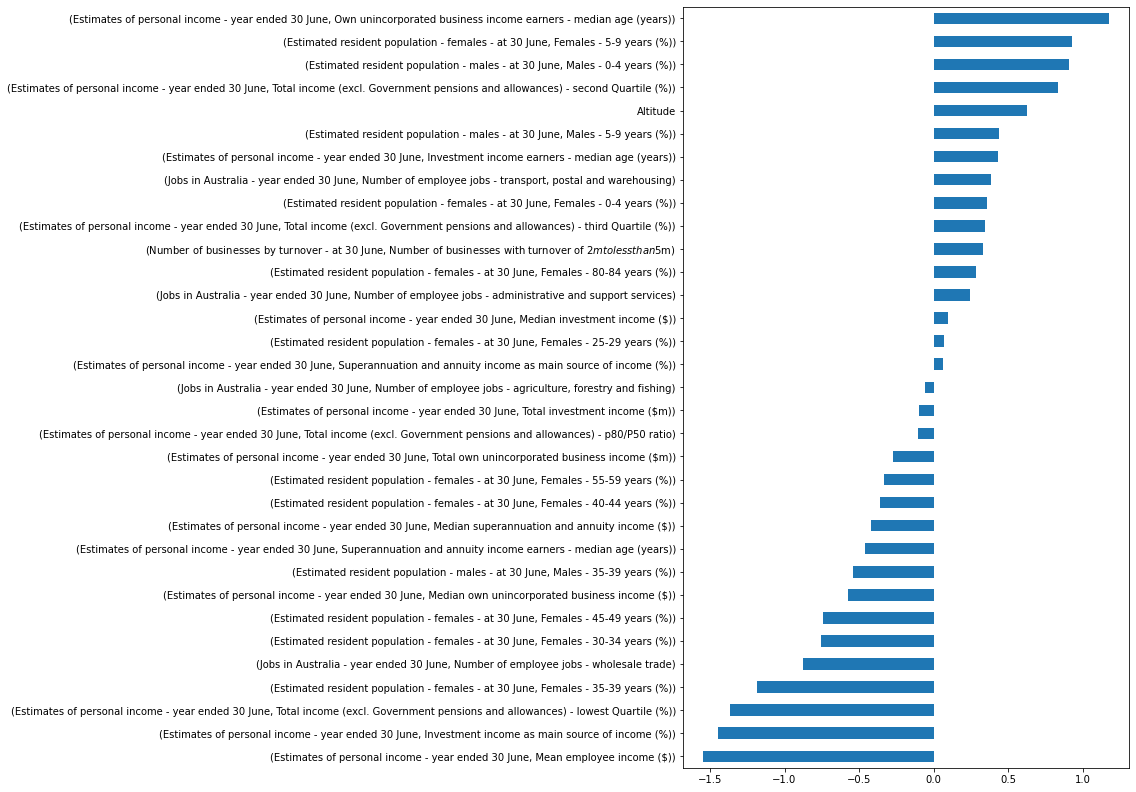

In [153]:
strong_factors = weightings[('males aged 18 years and over who were obese', '2017-18')].sort_values()
strong_factors = strong_factors[strong_factors.abs() > 0.01]
strong_factors.plot.barh(figsize=(8,14))

<AxesSubplot:>

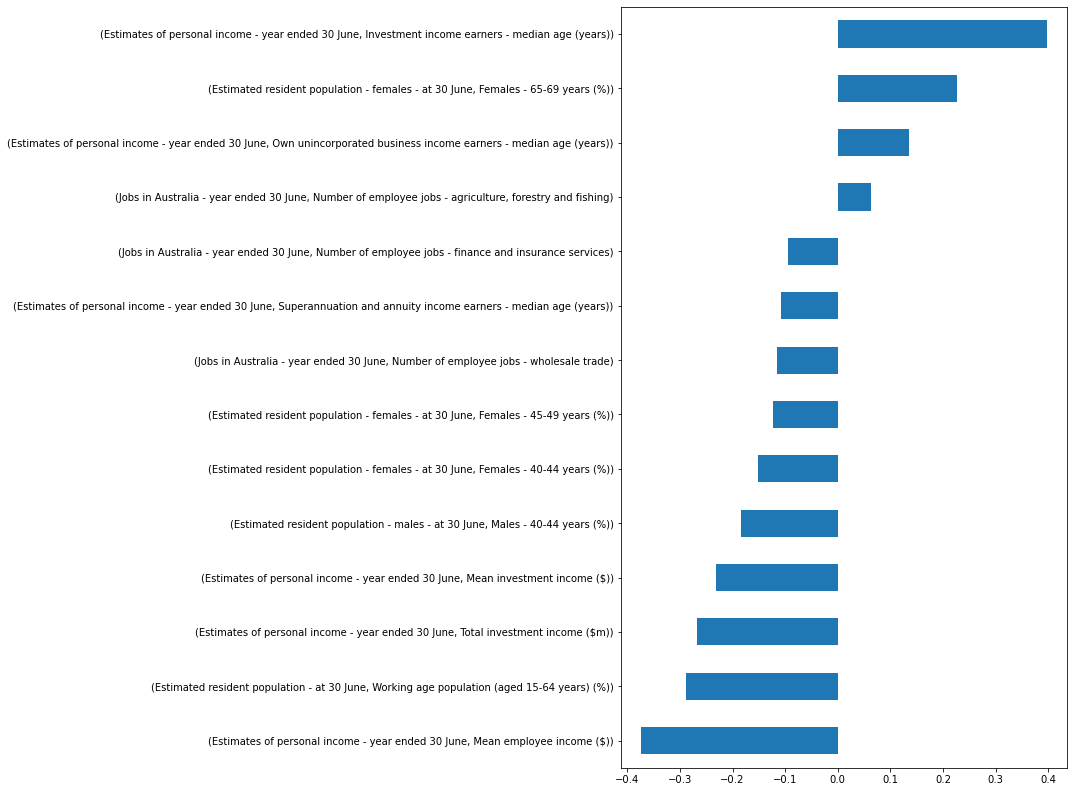

In [154]:
strong_factors = weightings[('children aged 2-17 years who were overweight or obese', '2017-18')].sort_values()
strong_factors = strong_factors[strong_factors.abs() > 0.01]
strong_factors.plot.barh(figsize=(8,14))